In [149]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
net = cv2.dnn.readNetFromDarknet("/Users/anubhav/Desktop/yolov3_custom.cfg",
                                 "/Users/anubhav/Desktop/yolov3-obj_30000.weights")
classes = ['fish']

In [151]:
x_cen=0
my_list = []


cap = cv2.VideoCapture('/Users/anubhav/Desktop/fish_clip_s.mp4')

while 1:
    _, img = cap.read()
    img = cv2.resize(img,(960,480))
    hight,width,_ = img.shape
    blob = cv2.dnn.blobFromImage(img, 1/255,(416,416),(0,0,0),swapRB = True,crop= False)

    net.setInput(blob)

    output_layers_name = net.getUnconnectedOutLayersNames()

    layerOutputs = net.forward(output_layers_name)

    boxes =[]
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.7:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)
    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)

    boxes =[]
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)

                x = int(center_x - w/2)
                y = int(center_y - h/2)



                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.8,.4)
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0,255,size =(len(boxes),3))
    if  len(indexes)>0:
        for i in indexes.flatten():
            x,y,w,h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i],2))
            color = colors[i]
            cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
            
            
            my_list.append(w/2)
            
#             if(w/2>x_cen):
#                 my_list.append(w/2)
#                 x_cen = w/2


            
            cv2.putText(img,label + " " + confidence, (x,y+400),font,2,color,2)

    cv2.imshow('img',img)
    if cv2.waitKey(1) == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()



error: OpenCV(4.5.3) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-r0utbq5z/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [152]:
my_list

[73.5,
 73.5,
 74.0,
 73.5,
 73.5,
 69.5,
 64.5,
 65.5,
 67.0,
 67.0,
 61.5,
 64.5,
 50.0,
 58.5,
 60.0,
 63.0,
 61.0,
 61.0,
 65.5,
 59.5,
 59.5,
 63.0,
 63.5,
 56.5,
 56.5,
 65.5,
 74.5,
 70.5,
 70.5,
 76.5,
 78.0,
 79.0,
 69.5,
 73.5,
 76.0,
 76.5,
 74.5,
 74.0,
 79.0,
 84.0,
 84.0,
 84.0,
 83.0,
 83.5,
 83.5,
 84.5,
 87.0,
 89.0,
 86.5,
 84.0,
 82.0,
 82.0,
 80.5,
 81.0,
 82.0,
 83.0,
 84.0]

In [153]:
df = pd.DataFrame(my_list)
df.shape

(57, 1)

In [154]:
import matplotlib.pyplot as plt 
%matplotlib inline


In [155]:
df.columns = ['centre']
df.head()

,centre
0,73.5
1,73.5
2,74.0
3,73.5
4,73.5


<AxesSubplot:>

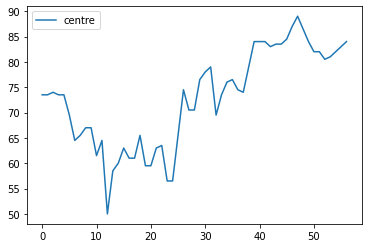

In [156]:
df.plot()

In [157]:
from statsmodels.tsa.stattools import adfuller

In [158]:
test_result = adfuller(df['centre'])

In [159]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [160]:
df['Seasonal First Difference'] = df['centre']-df['centre'].shift(12)

In [161]:
df.shape

(57, 2)

In [162]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.065505388776972
p-value : 0.029213514558798344
#Lags Used : 0
Number of Observations Used : 44
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

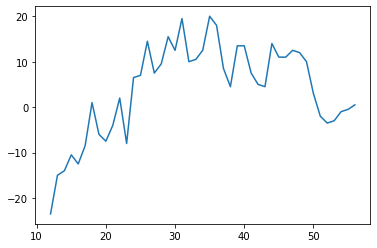

In [163]:
df['Seasonal First Difference'].plot()

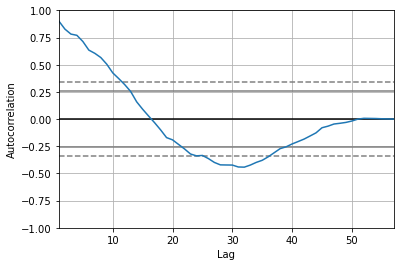

In [164]:
 from pandas.plotting import autocorrelation_plot
 autocorrelation_plot(df['centre'])
 plt.show()

In [165]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

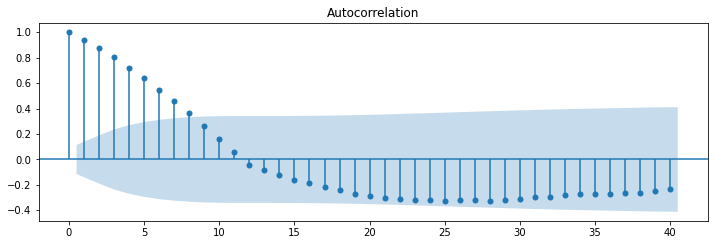

In [140]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
# ax2 = fig.add_subplot(212)
# fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [166]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [186]:
model=ARIMA(df['centre'],order=(1,1,1))
model_fit=model.fit()

/Users/anubhav/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/anubhav/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and st

<AxesSubplot:>

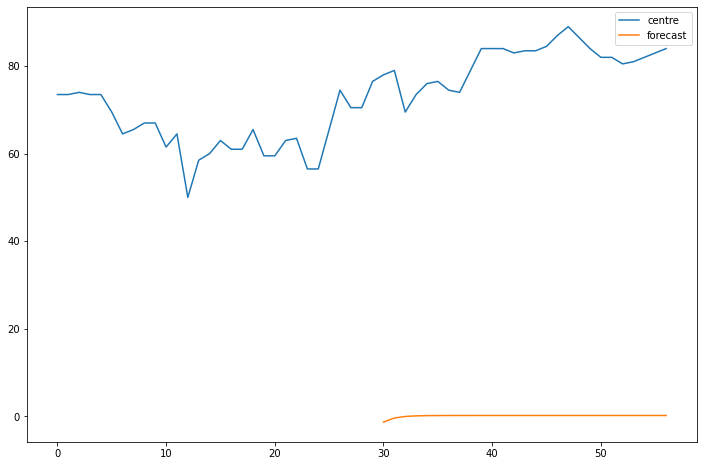

In [188]:
df['forecast']=model_fit.predict(start=30,end=57,dynamic=True)
df[['centre','forecast']].plot(figsize=(12,8))

In [179]:
model=sm.tsa.statespace.SARIMAX(df['centre'],order=(1, 1, 10),seasonal_order=(1,1,1,12))
results=model.fit()

/Users/anubhav/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/anubhav/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/anubhav/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/anubhav/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization faile

<AxesSubplot:>

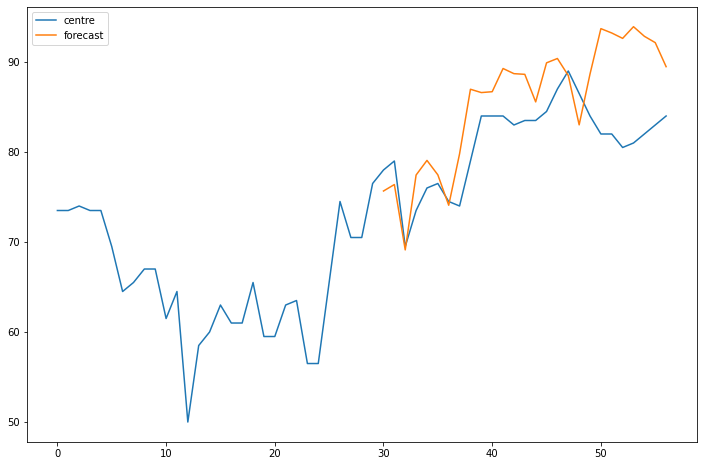

In [181]:
df['forecast']=results.predict(start=30,end=57,dynamic=True)
df[['centre','forecast']].plot(figsize=(12,8))